<a href="https://colab.research.google.com/github/vis-hal-k/Internship_Data_science/blob/main/Patching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install patchify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import patchify
from PIL import Image 
from matplotlib import pyplot as plt 
import numpy as np 

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
splash = "/content/drive/MyDrive/Colab Notebooks/Internship/splash.jpg"
img = Image.open(splash)

In [13]:
display(type(img))
display(img.size)

PIL.JpegImagePlugin.JpegImageFile

(4928, 3285)

In [14]:
img.width, img.height,img.mode

(4928, 3285, 'RGB')

(800, 400)

PIL.Image.Image

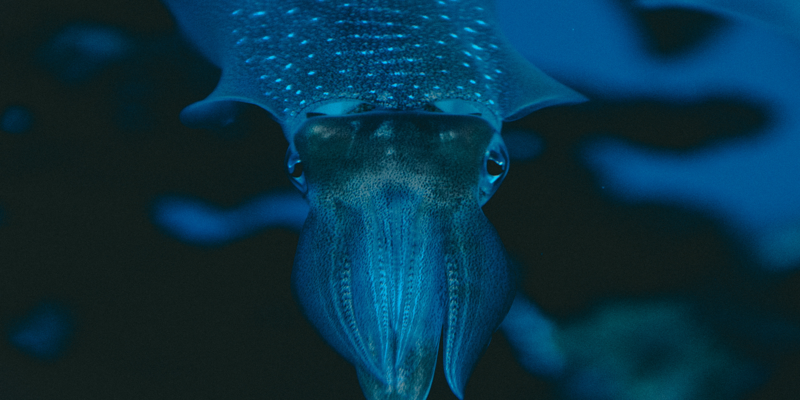

In [15]:
rimg = img.resize((800,400))
display(rimg.size)
display(type(rimg))
rimg

In [16]:
gather = []
patches = patchify.patchify(np.asarray(rimg) , patch_size=(100,100,3) , step = 100)


In [17]:
patches.shape
#  6 dimension

(4, 8, 1, 100, 100, 3)

Dimension 1-> 4: Corresponds to the number of patches in the vertical direction.

Dimension 2-> 8: Corresponds to the number of patches in the horizontal direction.

Dimension 3 ->1: Represents the depth of each patch, which is always 1 for a single patch.

Dimension 4->100 : Represents the height of each patch (100 pixels).

Dimension 5->100 : Represents the width of each patch (100 pixels).

Dimension 6->3: Represents the number of color channels in each patch (3 channels for RGB).



In [18]:
gatherArr = np.asarray(gather)
gatherArr

array([], dtype=float64)

In [19]:
for i in range (patches.shape[0]):
  for j in range (patches.shape[1]):
    get_patches= patches[i,j,0,:,:,:]
    gather.append(get_patches)

In [20]:
display(len(gather)) # 4 * 8

32

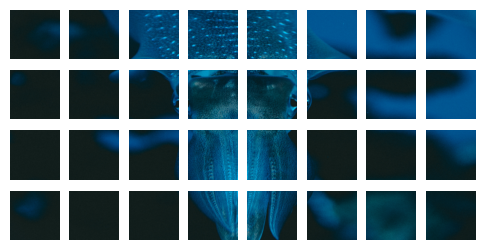

In [21]:
fig1,ax1 = plt.subplots(nrows=4, ncols = 8 , figsize=(6,3))
a=0
for R1 in range(4):
  for C1 in range(8):
    ax1[R1,C1].imshow(gather[a])
    ax1[R1,C1].axis('off')
    a += 1

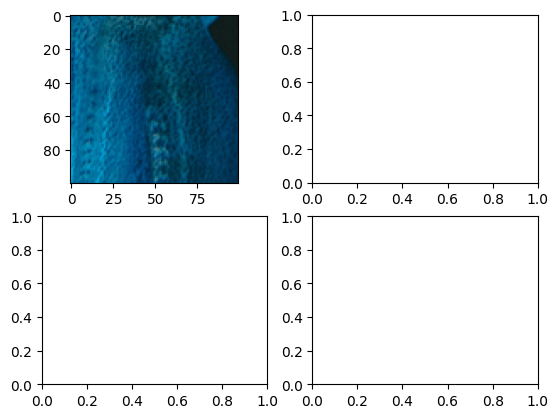

In [22]:
fig , axs = plt.subplots(2,2)
imt =  axs[0,0].imshow(gather[20])

In [23]:
# gather[0][:,:,0]
gather[0][:] = [200,155,2] 

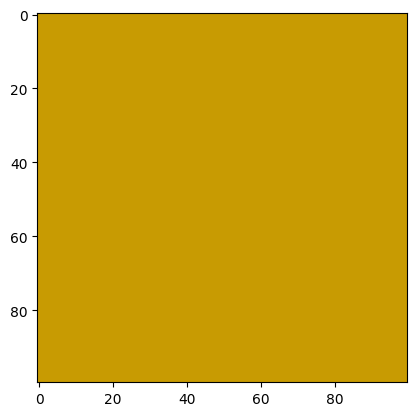

In [24]:
plt.imshow(gather[0])

In [25]:
# plt.imshow(gather[1] , cmap='gray', interpolation='none', alpha=1.0, hatch='/', edgecolor='black', linewidth=0.5)
# plt.xticks([])
# plt.yticks([])  
# plt.show()


In [26]:
# gather[0] = gather[0].set_cmap('nipy_spectral')

In [27]:
gather[20][:] = [2,73,112]
gather[20][:] 

array([[[  2,  73, 112],
        [  2,  73, 112],
        [  2,  73, 112],
        ...,
        [  2,  73, 112],
        [  2,  73, 112],
        [  2,  73, 112]],

       [[  2,  73, 112],
        [  2,  73, 112],
        [  2,  73, 112],
        ...,
        [  2,  73, 112],
        [  2,  73, 112],
        [  2,  73, 112]],

       [[  2,  73, 112],
        [  2,  73, 112],
        [  2,  73, 112],
        ...,
        [  2,  73, 112],
        [  2,  73, 112],
        [  2,  73, 112]],

       ...,

       [[  2,  73, 112],
        [  2,  73, 112],
        [  2,  73, 112],
        ...,
        [  2,  73, 112],
        [  2,  73, 112],
        [  2,  73, 112]],

       [[  2,  73, 112],
        [  2,  73, 112],
        [  2,  73, 112],
        ...,
        [  2,  73, 112],
        [  2,  73, 112],
        [  2,  73, 112]],

       [[  2,  73, 112],
        [  2,  73, 112],
        [  2,  73, 112],
        ...,
        [  2,  73, 112],
        [  2,  73, 112],
        [  2,  73, 112]]

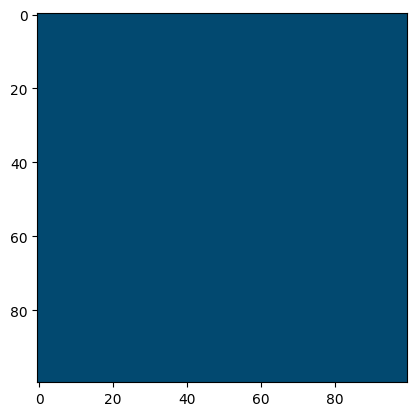

In [28]:
plt.imshow(gather[20])

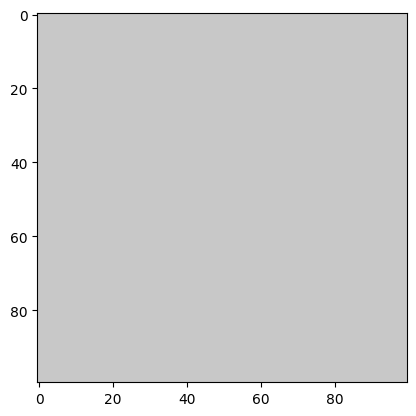

In [29]:
gather[2][:]=[200]
plt.imshow(gather[2])

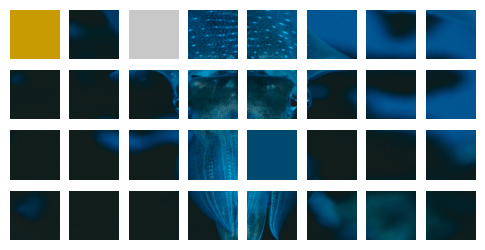

In [30]:
fig1,ax1 = plt.subplots(nrows=4, ncols = 8 , figsize=(6,3))
a=0
for R1 in range(4):
  for C1 in range(8):
    ax1[R1,C1].imshow(gather[a])
    ax1[R1,C1].axis('off')
    a += 1

In [31]:
# UNPATCHIFIED 

In [32]:
np.asarray(rimg).shape

(400, 800, 3)

In [33]:
from patchify import unpatchify
gatherA = np.asarray(gather) 
# reconstructed_image = unpatchify(gatherA,  ( , ), patch_size)

In [34]:
reco_img = unpatchify(patches , np.asarray(rimg).shape) 
#  arg1 -> patches -> array where all pac

numpy.ndarray

array([[[200, 155,   2],
        [200, 155,   2],
        [200, 155,   2],
        ...,
        [  2,  93, 143],
        [  2,  93, 143],
        [  1,  96, 146]],

       [[200, 155,   2],
        [200, 155,   2],
        [200, 155,   2],
        ...,
        [  2,  95, 145],
        [  2,  93, 143],
        [  1,  92, 144]],

       [[200, 155,   2],
        [200, 155,   2],
        [200, 155,   2],
        ...,
        [  1,  96, 146],
        [  2,  98, 148],
        [  1,  95, 145]],

       ...,

       [[ 18,  31,  31],
        [ 18,  31,  31],
        [ 19,  32,  32],
        ...,
        [ 13,  28,  29],
        [ 14,  29,  28],
        [ 14,  29,  28]],

       [[ 17,  31,  31],
        [ 14,  28,  28],
        [ 19,  33,  33],
        ...,
        [ 15,  29,  29],
        [ 13,  28,  28],
        [ 11,  27,  27]],

       [[ 20,  33,  33],
        [ 18,  32,  32],
        [ 17,  31,  31],
        ...,
        [ 12,  27,  28],
        [ 15,  29,  29],
        [ 14,  29,  29]]

(400, 800, 3)

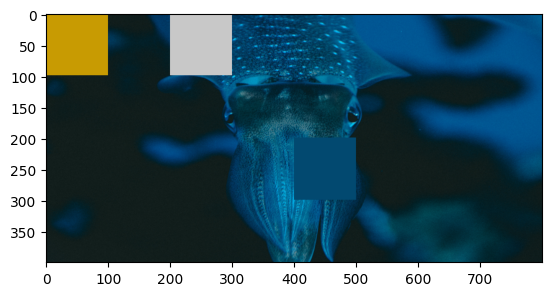

In [35]:
np.asarray(rimg).shape
display(type(reco_img))
display(reco_img)
display(reco_img.shape)
plt.imshow(reco_img) 